In [199]:
from math import *
import numpy as np
from qutip import *
from qutip import bloch
import matplotlib.pyplot as plt
from scipy.linalg import expm, fractional_matrix_power
import cmath

#########################################################################

# pauli matrix 
sx = np.array([[0,  1],     [1, 0]])
sy = np.array([[0, -1j],   [1j, 0]])
sz = np.array([[1, 0],     [0, -1]])
s0 = np.array([[1, 0],      [0, 1]])

# parameters(detuning factor)
v0 = 0.02           # Arbitrary settings, Actual speed : 0.04rad/μs
d0 = 0.15           # Arbitrary settings, Actual speed : 0.30rad/μs


# unitary operator
def unitary(dt, choice):
    
    # Select x,y-rotation direction.
    # [stay, +x, -x, +y, -y]
    choice_list = [0, 1, -1, 1, -1] 
    
    if choice < 3:
        # if choice = 0 ... only d0*sz
        Ham = (d0*sz+v0*choice_list[choice]*sx)
    else:
        Ham = (d0*sz+v0*choice_list[choice]*sy)

    # Creating a Unitary Operator for each of the four sections by Hamiltonian
    eigvals = np.linalg.eigh(Ham)[0]
    eigvecs = 1*np.linalg.eigh(Ham)[1]
    E = np.diag(eigvals)
    U_H = eigvecs.conj().T
    U_e = U_H.conj().T @ expm(-1j*E*dt) @ U_H
    
    return U_e


#########################################################################

# x-rotation operater
def Rx(theta):
    return np.matrix([  [cos(theta/2),    -1j*sin(theta/2)],
                        [-1j*sin(theta/2),    cos(theta/2)]])

# z-rotation operater
# Do not use Rz. Control by rotation only by Hamiltonian.
def Rz(phi): 
    return np.matrix([  [cos(phi/2)-1j*sin(phi/2),  0],
                        [0,  cos(phi/2)+1j*sin(phi/2)]])

# Calculating the Fidelity
def state_fidelity(rho_1, rho_2): 
    
    # rho_1(current state), rho_2(target state)
    # Calculate the fidelity after checking the dimensions of the two states.
    
    if np.shape(rho_1) != np.shape(rho_2):
            print("Dimensions of two states do not match.")
            return 0
    else:
        sqrt_rho_1 = fractional_matrix_power(rho_1, 1 / 2)
        fidelity = np.trace(fractional_matrix_power(sqrt_rho_1 @ rho_2 @ sqrt_rho_1, 1 / 2)) ** 2
        return np.real(fidelity)


#########################################################################

In [200]:
# dt = 2.6
# target_theta, target_phi = 2.4241177960054614, 1.4388044532389939
# combi = [1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 3, 3]
dt = 2.55
target_theta, target_phi = 2.34235686, 3.61213683
combi = [2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 2, 2, 4]

print(len(combi))
print(dt*len(combi))

26
66.3


In [201]:
init_wave = np.array([[1], [0]])
irho_init = np.kron(init_wave,init_wave.conj().T)

target_U = Rz(target_phi) @ Rx(target_theta)
irho_target = target_U @ irho_init @target_U.conj().T


# 중첩에서 시작할때 필요한 코드
# irho_init = Rx(pi/2) @ irho_init @Rx(pi/2).conj().T

In [202]:
k = 50
combination = []

for i in combi :
    combination += [i for j in range(k)]

print(combination)

dt = dt/k

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

[-1.5605690156253453e-05, 0.0020399189954209787, 0.9999979192413121]
0.15202757897558666
[-6.241904261818714e-05, 0.004079351986526816, 0.9999916774609836]
0.1526888785683112
[-0.00014042890425111588, 0.00611781308479138, 0.9999812761460987]
0.1533563879822923
[-0.0002496166894496984, 0.008154816633238967, 0.9999667177747387]
0.15402994728808
[-0.00038995638456589964, 0.010189877322150553, 0.9999480058153896]
0.15470939670357706
[-0.0005614145541066607, 0.012222510304687316, 0.9999251447261172]
0.15539457234311238
[-0.0007639503486998009, 0.01425223131240388, 0.9998981399535044]
0.15608531127164255
[-0.0009975155148262524, 0.016278556770623752, 0.9998669979313539]
0.1567814527730102
[-0.00126205440631631, 0.01830100391364948, 0.9998317260791549]
0.15748282800984623
[-0.001557503997607157, 0.020319090899780068, 0.9997923328003158]
0.15818926728310007
[-0.0018837938987585094, 0.02233233692610825, 0.9997488274801619]
0.15890060540434092
[-0.0022408463722227963, 0.024340262343070282, 0.999

0.19821377408243782
[-0.058890003039480554, 0.1103372758507907, 0.9921479995947136]
0.1989276794125955
[-0.060586686837028586, 0.11144705237733568, 0.9919217750883733]
0.19963677682373931
[-0.062300147426403565, 0.11253027699251239, 0.9916933136764564]
0.2003408978514147
[-0.0640299765809837, 0.11358669162144702, 0.9914626697891786]
0.20103987501532405
[-0.06577576217438771, 0.11461604457666111, 0.9912298983767244]
0.2017335435938372
[-0.06753708827866284, 0.1156180906180353, 0.990995054896154]
0.20242173382982365
[-0.06931353526337816, 0.11659259101123684, 0.9907581952981916]
0.20310428325800436
[-0.07110467989560035, 0.11753931358459756, 0.9905193760138948]
0.20378103221123056
[-0.07291009544072756, 0.11845803278442785, 0.9902786539412108]
0.20445181733311213
[-0.07472935176415761, 0.11934852972875419, 0.9900360864314198]
0.20511647844362751
[-0.07656201543376626, 0.1202105922594671, 0.9897917312754717]
0.20577486002285716
[-0.07840764982317094, 0.12104401499286717, 0.989545646690217

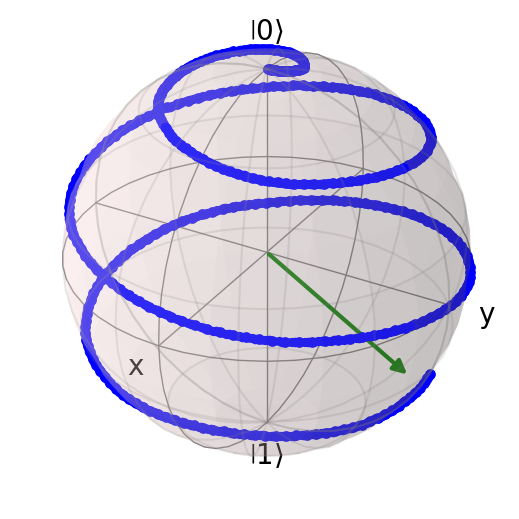

In [203]:
b = Bloch()
irho_mid = np.matrix(irho_init)
point_list = []
z = []
y = []

for i in combination:
    instant_U = unitary(dt, i)
    irho_mid = (instant_U @ irho_mid @ instant_U.conj().T)
    point = [np.trace(irho_mid * sx).real,
             np.trace(irho_mid * sy).real,
             np.trace(irho_mid * sz).real]
    b.add_points(point, 'm')
    print(point)
    z.append(np.trace(irho_mid * sz).real)
    y.append(np.trace(irho_mid * sy).real)
    point_list.append(point)
    print(state_fidelity(irho_target, irho_mid))

vector = np.array([np.trace(irho_target * sx).real,
             np.trace(irho_target * sy).real,
             np.trace(irho_target * sz).real])

print(state_fidelity(irho_target, irho_mid))

b.vector_color=['g']
b.add_vectors(vector)
# b.vector_color=['g']
#b.add_vectors([0,0,1],colors = 'r')
b.point_marker = ['o']
b.show()

In [204]:
state_fidelity(irho_mid, irho_target)

0.9775146724721478